In [1]:
import warnings
import torch
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from seq2seq.tools.inference import Translator

sn.set(font="Verdana")
warnings.filterwarnings('ignore')


In [2]:

cuda = False
checkpoint = torch.load('../results/en_he_dual_resumed/checkpoint.pth.tar')
model = checkpoint['model']
src_tok, target_tok = checkpoint['tokenizers'].values()

translation_model = Translator(model,
                               src_tok=src_tok,
                               target_tok=target_tok,
                               beam_size=5,
                               get_attention=True,
                               length_normalization_factor=0.6,
                               cuda=cuda)

def draw_attention(mat, src, target):
    df_cm = pd.DataFrame(mat.cpu().numpy(), index = src, columns = target)
    %matplotlib inline
    plt.figure(figsize = (len(src),len(target)))
    sn.heatmap(df_cm, annot=True)

def translate(s, src_lang, target_lang, target_priming=None):
    translation_model.set_src_language(src_lang)
    translation_model.set_target_language(target_lang)
    pred, att = translation_model.translate(s, target_priming=target_priming)
    print(pred)
    draw_attention(*att)

def en2he(s, target_priming=None):
    translate(s, 'en', 'he', target_priming=target_priming)
    
def he2en(s, target_priming=None):
    translate(s, 'he', 'en', target_priming=target_priming)

Hello, world.


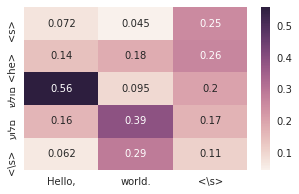

In [3]:
he2en('שלום עולם')


How are you this morning?


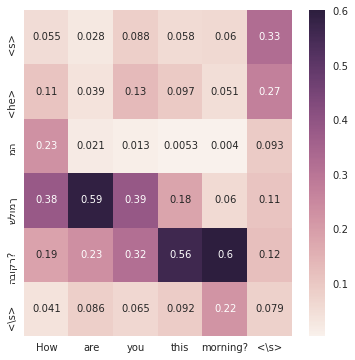

In [4]:
he2en('מה שלומך הבוקר?')

שלום לעולם


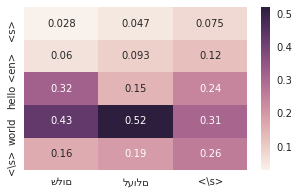

In [5]:
en2he('hello world')

נראה שזה עובד טוב טוב.


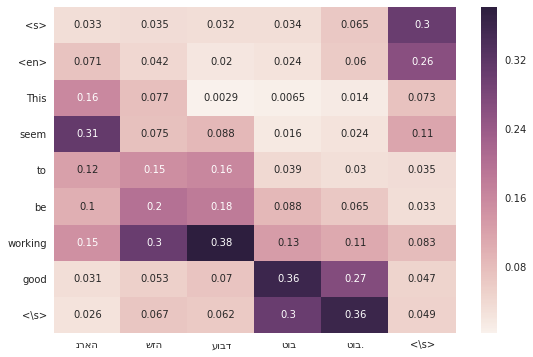

In [6]:
en2he('This seem to be working good')

ייתכן שהכוח יהיה איתך איתך.


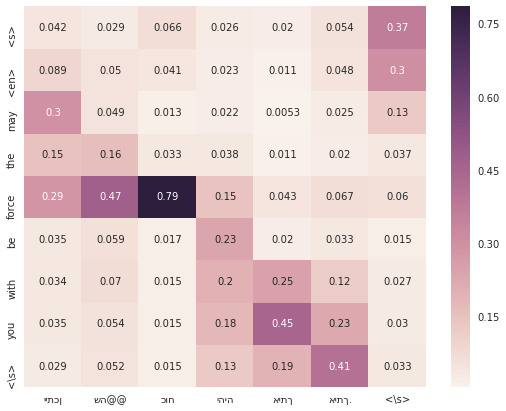

In [7]:
en2he('may the force be with you')

מה אתה עושה בשלושה כלבים?


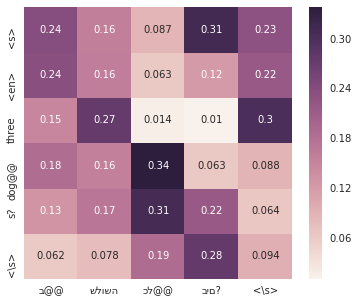

In [8]:
en2he('three dogs?',target_priming='מה אתה עושה')